# <center> 👉 class_13_3 » _Pose Estimation (Ⅲ)_ </center>   

# Pose Estimation w/ MediaPipe
https://www.analyticsvidhya.com/blog/2021/05/pose-estimation-using-opencv/  
https://chuoling.github.io/mediapipe/  

## ■ Images

In [9]:
import cv2
import mediapipe as mp
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose 

def plt_imshow(title='image', img=None, figsize=(5 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

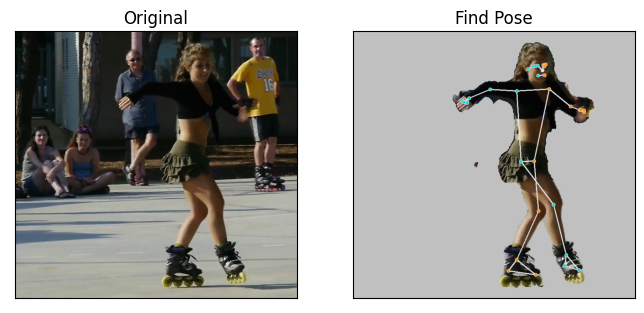

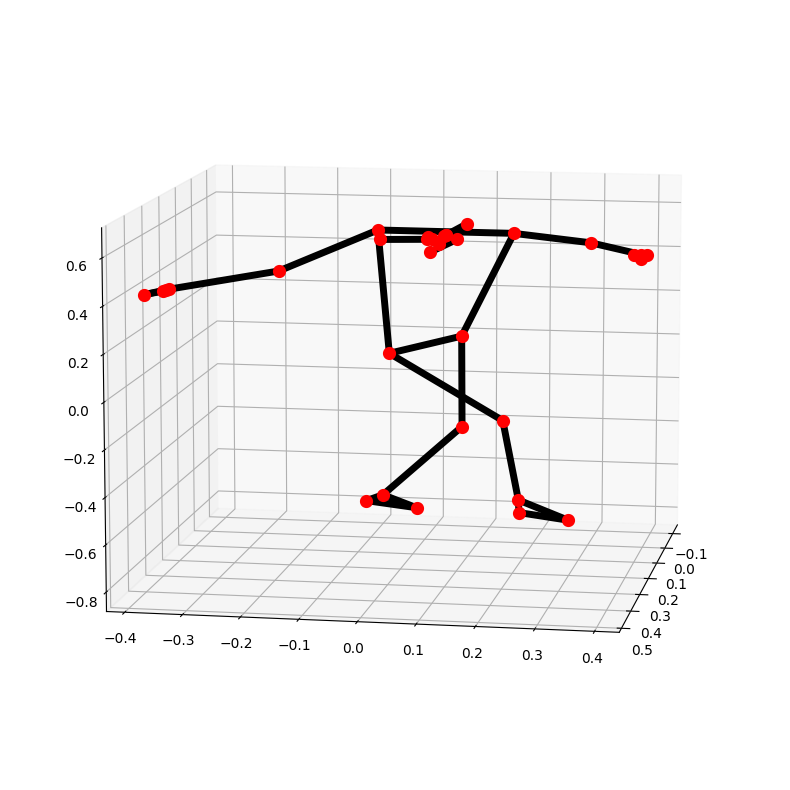

In [14]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

# IMAGE_FILES = ['./images/CV/pose_man.png']
IMAGE_FILES = ['./pose_est/skate.jpg']
BG_COLOR = (192, 192, 192)  # gray
with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5) as pose:
    for idx, file in enumerate(IMAGE_FILES):
        image = cv2.imread(file)
        image_height, image_width, _ = image.shape
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        if not results.pose_landmarks:
            continue
#         print(f'Nose coordinates: ('
#             f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
#             f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_height})'
#         )

        annotated_image = image.copy()
        # Split the image. To improve the division around the boundary, consider applying a co-two-way filter to the "results.segmentation_mask" with the "image".
        # 이미지를 분할합니다. 경계 주변의 분할을 개선하려면 "image"가 있는 "results.segmentation_mask"에 공동 양방향 필터를 적용하는 것이 좋습니다.
        condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
        bg_image = np.zeros(image.shape, dtype=np.uint8)
        bg_image[:] = BG_COLOR
        annotated_image = np.where(condition, annotated_image, bg_image)
        mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
#         cv2.imwrite('./results/pose_body_annotated_image' + str(idx) + '.png', annotated_image)
        plt_imshow(["Original", "Find Pose"], [image, annotated_image], figsize=(8,5))
#         mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS) # draw pose_world_landmarks


In [8]:
import cv2
import mediapipe as mp
import time

mpPose = mp.solutions.pose
pose = mpPose.Pose()
mpDraw = mp.solutions.drawing_utils

#cap = cv2.VideoCapture(0)
# cap = cv2.VideoCapture('./cv_data/pose_est/pose_push-up.gif')
cap = cv2.VideoCapture('./pose_est/pose_dance.mp4')
pTime = 0

while True:
    success, img = cap.read()
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_org = imgRGB.copy()
    results = pose.process(imgRGB)
#     print(results.pose_landmarks)
    if results.pose_landmarks:
        mpDraw.draw_landmarks(img, results.pose_landmarks, mpPose.POSE_CONNECTIONS)
        for id, lm in enumerate(results.pose_landmarks.landmark):
            h, w,c = img.shape
            print(id, lm)
            cx, cy = int(lm.x*w), int(lm.y*h)
            cv2.circle(img, (cx, cy), 5, (255,0,0), cv2.FILLED)

        cTime = time.time()
        fps = 1/(cTime-pTime)
        pTime = cTime

    cv2.putText(img, str(int(fps)), (50,50), cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0), 3)
    cv2.imshow("Org", img_org)
    cv2.imshow("Image", img)
    if cv2.waitKey(10) & 0xFF == 27:
        break
cap.release()
cv2.destroyAllWindows()

0 x: 0.7142147421836853
y: 0.7954739332199097
z: 0.24569275975227356
visibility: 0.9993832111358643

1 x: 0.7145345211029053
y: 0.8004205226898193
z: 0.23908044397830963
visibility: 0.9995736479759216

2 x: 0.7158971428871155
y: 0.8000843524932861
z: 0.23907604813575745
visibility: 0.9994847774505615

3 x: 0.7172486782073975
y: 0.7996499538421631
z: 0.23912939429283142
visibility: 0.9995611310005188

4 x: 0.710360586643219
y: 0.7999264597892761
z: 0.2423877865076065
visibility: 0.9995269775390625

5 x: 0.7087973952293396
y: 0.7991184592247009
z: 0.2423364669084549
visibility: 0.9994495511054993

6 x: 0.7072194218635559
y: 0.7982270121574402
z: 0.242252916097641
visibility: 0.9996389150619507

7 x: 0.7207922339439392
y: 0.7891360521316528
z: 0.19737404584884644
visibility: 0.999200165271759

8 x: 0.7064435482025146
y: 0.7859686017036438
z: 0.21441324055194855
visibility: 0.9996424913406372

9 x: 0.7190547585487366
y: 0.7843189835548401
z: 0.23123015463352203
visibility: 0.99907505512237

0 x: 0.26350611448287964
y: 0.7603105902671814
z: -0.0416971817612648
visibility: 0.9567803740501404

1 x: 0.26027265191078186
y: 0.7419593930244446
z: -0.03265095874667168
visibility: 0.9538156986236572

2 x: 0.26008617877960205
y: 0.7422569394111633
z: -0.03270161524415016
visibility: 0.9531546831130981

3 x: 0.2598668932914734
y: 0.7426344752311707
z: -0.03276274725794792
visibility: 0.9596223831176758

4 x: 0.2592135965824127
y: 0.7420256733894348
z: -0.05103497952222824
visibility: 0.956407368183136

5 x: 0.25745052099227905
y: 0.7438993453979492
z: -0.05105013772845268
visibility: 0.9512792229652405

6 x: 0.2563713490962982
y: 0.7444708347320557
z: -0.0511360839009285
visibility: 0.9560202360153198

7 x: 0.2537248730659485
y: 0.7483336329460144
z: 0.006993307266384363
visibility: 0.9553616642951965

8 x: 0.2506037950515747
y: 0.7486734986305237
z: -0.077581025660038
visibility: 0.9585429430007935

9 x: 0.2601775527000427
y: 0.7699093222618103
z: -0.020832868292927742
visibility: 

0 x: 0.2639590799808502
y: 0.7703273296356201
z: -0.08752889186143875
visibility: 0.968838095664978

1 x: 0.26410481333732605
y: 0.7620807886123657
z: -0.07665084302425385
visibility: 0.9667083024978638

2 x: 0.2646504044532776
y: 0.7622330188751221
z: -0.07667683809995651
visibility: 0.9659680128097534

3 x: 0.26519522070884705
y: 0.7623991370201111
z: -0.07676674425601959
visibility: 0.970790445804596

4 x: 0.2613235116004944
y: 0.7609646916389465
z: -0.08564045280218124
visibility: 0.9685414433479309

5 x: 0.2598358988761902
y: 0.7604084610939026
z: -0.08563144505023956
visibility: 0.9644654393196106

6 x: 0.25823843479156494
y: 0.7598947286605835
z: -0.08568061143159866
visibility: 0.9680069088935852

7 x: 0.2630281448364258
y: 0.7638884782791138
z: -0.007838448509573936
visibility: 0.9677819609642029

8 x: 0.2533673048019409
y: 0.7610630989074707
z: -0.05306800454854965
visibility: 0.9697641134262085

9 x: 0.2637530565261841
y: 0.7793982028961182
z: -0.05984705686569214
visibility

0 x: 0.2680029273033142
y: 0.7769455909729004
z: -0.08068360388278961
visibility: 0.9789206385612488

1 x: 0.27004462480545044
y: 0.7690871357917786
z: -0.07218613475561142
visibility: 0.9776760935783386

2 x: 0.27116772532463074
y: 0.7695539593696594
z: -0.07220820337533951
visibility: 0.977088451385498

3 x: 0.27215126156806946
y: 0.770018458366394
z: -0.07230421900749207
visibility: 0.9803359508514404

4 x: 0.2651871144771576
y: 0.7669996619224548
z: -0.08063922822475433
visibility: 0.9789291620254517

5 x: 0.26306426525115967
y: 0.7661433815956116
z: -0.08061229437589645
visibility: 0.9762172102928162

6 x: 0.2609387934207916
y: 0.7653661370277405
z: -0.08068687468767166
visibility: 0.9786549210548401

7 x: 0.270999938249588
y: 0.7710260152816772
z: -0.010636474937200546
visibility: 0.9783496856689453

8 x: 0.257420152425766
y: 0.7652941942214966
z: -0.04041874036192894
visibility: 0.9798957705497742

9 x: 0.2691856622695923
y: 0.7854791879653931
z: -0.05525693669915199
visibility:

0 x: 0.2650285065174103
y: 0.7823349833488464
z: -0.10823198407888412
visibility: 0.9854850172996521

1 x: 0.2676013708114624
y: 0.7764113545417786
z: -0.10177812725305557
visibility: 0.9843404293060303

2 x: 0.26870986819267273
y: 0.7766609787940979
z: -0.10185679793357849
visibility: 0.9841816425323486

3 x: 0.2699398100376129
y: 0.7770304679870605
z: -0.10192577540874481
visibility: 0.9862872362136841

4 x: 0.2634076476097107
y: 0.7760056257247925
z: -0.10135922580957413
visibility: 0.9849718809127808

5 x: 0.26147907972335815
y: 0.7758215665817261
z: -0.10140780359506607
visibility: 0.9832662343978882

6 x: 0.259872168302536
y: 0.7755866050720215
z: -0.1015138104557991
visibility: 0.984765887260437

7 x: 0.2712160050868988
y: 0.7807357907295227
z: -0.051239367574453354
visibility: 0.9849799871444702

8 x: 0.2583305537700653
y: 0.7788296341896057
z: -0.040816083550453186
visibility: 0.9856691956520081

9 x: 0.26749521493911743
y: 0.7898059487342834
z: -0.0879104882478714
visibility:

0 x: 0.2664698362350464
y: 0.8038722276687622
z: -0.11764878779649734
visibility: 0.9870021343231201

1 x: 0.2686636745929718
y: 0.798904299736023
z: -0.11016038805246353
visibility: 0.9863905310630798

2 x: 0.270067036151886
y: 0.7994139790534973
z: -0.1102209985256195
visibility: 0.9865702986717224

3 x: 0.2714826762676239
y: 0.7999137043952942
z: -0.11027824878692627
visibility: 0.9882793426513672

4 x: 0.264690101146698
y: 0.7984175086021423
z: -0.11082138121128082
visibility: 0.9862366914749146

5 x: 0.26342570781707764
y: 0.7987263202667236
z: -0.1108454018831253
visibility: 0.9848558306694031

6 x: 0.26222875714302063
y: 0.7989676594734192
z: -0.1109364703297615
visibility: 0.9861000180244446

7 x: 0.27309849858283997
y: 0.8042871952056885
z: -0.05908448249101639
visibility: 0.9869646430015564

8 x: 0.26014378666877747
y: 0.8032726049423218
z: -0.059947479516267776
visibility: 0.9868534803390503

9 x: 0.26903775334358215
y: 0.8121476173400879
z: -0.0975860208272934
visibility: 0

0 x: 0.26858359575271606
y: 0.8182491660118103
z: -0.13642148673534393
visibility: 0.988849937915802

1 x: 0.2712985575199127
y: 0.8103020787239075
z: -0.13123486936092377
visibility: 0.9888189435005188

2 x: 0.2727835476398468
y: 0.8104987144470215
z: -0.13139833509922028
visibility: 0.9890854954719543

3 x: 0.27421852946281433
y: 0.810596227645874
z: -0.1316315233707428
visibility: 0.9900870323181152

4 x: 0.2670040428638458
y: 0.8099404573440552
z: -0.12789712846279144
visibility: 0.9889054894447327

5 x: 0.26566779613494873
y: 0.8100528120994568
z: -0.12790052592754364
visibility: 0.9880914092063904

6 x: 0.26412227749824524
y: 0.8101556301116943
z: -0.12798042595386505
visibility: 0.9890562891960144

7 x: 0.2759653627872467
y: 0.813385546207428
z: -0.07717548310756683
visibility: 0.9895716905593872

8 x: 0.2615773379802704
y: 0.8141651749610901
z: -0.07444019615650177
visibility: 0.9902871251106262

9 x: 0.2712235450744629
y: 0.8261831998825073
z: -0.11820805072784424
visibility: 

0 x: 0.27414026856422424
y: 0.8400362730026245
z: -0.16447512805461884
visibility: 0.9913976788520813

1 x: 0.2765165865421295
y: 0.8323928713798523
z: -0.15938761830329895
visibility: 0.9911724925041199

2 x: 0.27808108925819397
y: 0.8326848745346069
z: -0.15938638150691986
visibility: 0.9914696216583252

3 x: 0.27945053577423096
y: 0.8327611088752747
z: -0.15940545499324799
visibility: 0.9917147159576416

4 x: 0.27192577719688416
y: 0.8312657475471497
z: -0.16107338666915894
visibility: 0.9915624856948853

5 x: 0.27034035325050354
y: 0.8310836553573608
z: -0.16111424565315247
visibility: 0.9912241697311401

6 x: 0.26840418577194214
y: 0.8309725522994995
z: -0.1612016260623932
visibility: 0.9917289614677429

7 x: 0.2803709805011749
y: 0.8343941569328308
z: -0.10637693852186203
visibility: 0.9918337464332581

8 x: 0.26448023319244385
y: 0.8334280848503113
z: -0.11301734298467636
visibility: 0.9932156801223755

9 x: 0.2762067914009094
y: 0.8469831347465515
z: -0.14262543618679047
visibi

0 x: 0.27893221378326416
y: 0.868468701839447
z: -0.2039942592382431
visibility: 0.9932106137275696

1 x: 0.28112080693244934
y: 0.8592287302017212
z: -0.1991381198167801
visibility: 0.9928415417671204

2 x: 0.28272417187690735
y: 0.8593804240226746
z: -0.19914357364177704
visibility: 0.9931362867355347

3 x: 0.28433215618133545
y: 0.8595074415206909
z: -0.1991824060678482
visibility: 0.9927501678466797

4 x: 0.27602478861808777
y: 0.859789252281189
z: -0.200545072555542
visibility: 0.9935349225997925

5 x: 0.27434438467025757
y: 0.8604081273078918
z: -0.20060642063617706
visibility: 0.9935833215713501

6 x: 0.2726576030254364
y: 0.8610239028930664
z: -0.20069192349910736
visibility: 0.9938883781433105

7 x: 0.28555193543434143
y: 0.8627902865409851
z: -0.14460894465446472
visibility: 0.9933058023452759

8 x: 0.26845213770866394
y: 0.8646718263626099
z: -0.14998075366020203
visibility: 0.9953171014785767

9 x: 0.28156578540802
y: 0.8758618831634521
z: -0.1811264455318451
visibility: 0.

0 x: 0.2829608619213104
y: 0.8787356615066528
z: -0.19326315820217133
visibility: 0.9936202168464661

1 x: 0.28600528836250305
y: 0.8711479306221008
z: -0.1878543645143509
visibility: 0.9924829006195068

2 x: 0.28771379590034485
y: 0.8719207644462585
z: -0.1879117339849472
visibility: 0.9929141998291016

3 x: 0.28917744755744934
y: 0.8725543022155762
z: -0.18795743584632874
visibility: 0.9913647770881653

4 x: 0.2801365554332733
y: 0.8716235756874084
z: -0.18870887160301208
visibility: 0.9935078620910645

5 x: 0.2781815230846405
y: 0.8712942004203796
z: -0.18875442445278168
visibility: 0.9941139817237854

6 x: 0.27621936798095703
y: 0.8710288405418396
z: -0.1888357698917389
visibility: 0.9939799308776855

7 x: 0.2899877429008484
y: 0.8756351470947266
z: -0.13454927504062653
visibility: 0.9923028945922852

8 x: 0.2723967134952545
y: 0.8739165663719177
z: -0.13829977810382843
visibility: 0.9959027767181396

9 x: 0.28498852252960205
y: 0.8866050839424133
z: -0.17093393206596375
visibility

0 x: 0.2820494771003723
y: 0.9035986065864563
z: -0.2379029542207718
visibility: 0.9946303367614746

1 x: 0.28567197918891907
y: 0.8943988680839539
z: -0.23293636739253998
visibility: 0.9927741885185242

2 x: 0.287521094083786
y: 0.8945544362068176
z: -0.2329542189836502
visibility: 0.9937398433685303

3 x: 0.28913766145706177
y: 0.8943753242492676
z: -0.2329985797405243
visibility: 0.991442084312439

4 x: 0.2799598276615143
y: 0.893189549446106
z: -0.23329240083694458
visibility: 0.9935250878334045

5 x: 0.277652770280838
y: 0.8915480375289917
z: -0.23335494101047516
visibility: 0.9946375489234924

6 x: 0.2756686806678772
y: 0.891003429889679
z: -0.2334398329257965
visibility: 0.9938072562217712

7 x: 0.29086989164352417
y: 0.8938266038894653
z: -0.17645958065986633
visibility: 0.9927197694778442

8 x: 0.27235329151153564
y: 0.8921456933021545
z: -0.1772778183221817
visibility: 0.9964964985847473

9 x: 0.2844913601875305
y: 0.9104598164558411
z: -0.2143036276102066
visibility: 0.99530

0 x: 0.2826915383338928
y: 0.9378108978271484
z: -0.27293187379837036
visibility: 0.9951395988464355

1 x: 0.28581199049949646
y: 0.9288252592086792
z: -0.2680339217185974
visibility: 0.9936109185218811

2 x: 0.287082314491272
y: 0.9286913275718689
z: -0.2680470049381256
visibility: 0.9946240186691284

3 x: 0.288631409406662
y: 0.9284308552742004
z: -0.26811257004737854
visibility: 0.9927809238433838

4 x: 0.27995723485946655
y: 0.92811119556427
z: -0.2690282464027405
visibility: 0.9936871528625488

5 x: 0.27765509486198425
y: 0.9275755286216736
z: -0.2690947353839874
visibility: 0.994467556476593

6 x: 0.2759481370449066
y: 0.9270645976066589
z: -0.2691350281238556
visibility: 0.9933518767356873

7 x: 0.28893905878067017
y: 0.9257400631904602
z: -0.21034382283687592
visibility: 0.9940115213394165

8 x: 0.273000031709671
y: 0.9263095855712891
z: -0.21398714184761047
visibility: 0.9964065551757812

9 x: 0.2852121591567993
y: 0.9444376826286316
z: -0.24811314046382904
visibility: 0.99382

0 x: 0.28038308024406433
y: 0.9506615400314331
z: -0.2926056981086731
visibility: 0.9932388663291931

1 x: 0.28293314576148987
y: 0.9409087300300598
z: -0.2887427508831024
visibility: 0.9926473498344421

2 x: 0.2849150002002716
y: 0.9397399425506592
z: -0.2887481451034546
visibility: 0.9940445423126221

3 x: 0.28625112771987915
y: 0.9396974444389343
z: -0.2888335585594177
visibility: 0.9928238987922668

4 x: 0.27693623304367065
y: 0.9399843811988831
z: -0.2877848446369171
visibility: 0.9909005165100098

5 x: 0.27521318197250366
y: 0.9399375915527344
z: -0.2878398001194
visibility: 0.9907603859901428

6 x: 0.27318474650382996
y: 0.9401072263717651
z: -0.28783994913101196
visibility: 0.9887920618057251

7 x: 0.2874760329723358
y: 0.9400147199630737
z: -0.2305225282907486
visibility: 0.9942999482154846

8 x: 0.27125391364097595
y: 0.9413144588470459
z: -0.2245689183473587
visibility: 0.9938936829566956

9 x: 0.2834486961364746
y: 0.9580443501472473
z: -0.26670071482658386
visibility: 0.98

0 x: 0.28678300976753235
y: 0.9811126589775085
z: -0.1743234097957611
visibility: 0.992396891117096

1 x: 0.2891155481338501
y: 0.9723584055900574
z: -0.17155714333057404
visibility: 0.9914643168449402

2 x: 0.2898813784122467
y: 0.9718549847602844
z: -0.17149029672145844
visibility: 0.9930021166801453

3 x: 0.2907172739505768
y: 0.9711976051330566
z: -0.1714687943458557
visibility: 0.9920501112937927

4 x: 0.2856608033180237
y: 0.9716257452964783
z: -0.175184965133667
visibility: 0.990365207195282

5 x: 0.2837076783180237
y: 0.9702094197273254
z: -0.17517763376235962
visibility: 0.990432858467102

6 x: 0.2822263836860657
y: 0.9690837860107422
z: -0.1751331239938736
visibility: 0.9883117079734802

7 x: 0.2894277274608612
y: 0.9685908555984497
z: -0.12890544533729553
visibility: 0.9935137033462524

8 x: 0.27843207120895386
y: 0.9669994115829468
z: -0.14477118849754333
visibility: 0.9923951625823975

9 x: 0.2866550385951996
y: 0.9850525856018066
z: -0.15420706570148468
visibility: 0.9707

0 x: 0.3000143766403198
y: 0.9869582653045654
z: -0.030104171484708786
visibility: 0.9908432364463806

1 x: 0.29714977741241455
y: 0.9799929857254028
z: -0.025877445936203003
visibility: 0.9882112145423889

2 x: 0.29696208238601685
y: 0.9800665974617004
z: -0.02581808902323246
visibility: 0.9889752268791199

3 x: 0.29680508375167847
y: 0.9801849126815796
z: -0.025742463767528534
visibility: 0.9875045418739319

4 x: 0.2961227595806122
y: 0.9798123836517334
z: -0.03839390352368355
visibility: 0.9879505038261414

5 x: 0.29518648982048035
y: 0.9797649383544922
z: -0.03832308575510979
visibility: 0.9875605702400208

6 x: 0.29425519704818726
y: 0.9797071814537048
z: -0.038238778710365295
visibility: 0.9852086305618286

7 x: 0.29417720437049866
y: 0.9831323623657227
z: 0.002155634108930826
visibility: 0.9861675500869751

8 x: 0.29039710760116577
y: 0.9834302067756653
z: -0.054618701338768005
visibility: 0.9872667193412781

9 x: 0.29884663224220276
y: 0.9942027926445007
z: -0.01676143333315849

0 x: 0.30275779962539673
y: 0.9899333715438843
z: -0.030801991000771523
visibility: 0.9916887879371643

1 x: 0.30143022537231445
y: 0.9876388907432556
z: -0.02647455967962742
visibility: 0.989233672618866

2 x: 0.3017907440662384
y: 0.9880049228668213
z: -0.026395952329039574
visibility: 0.9891923666000366

3 x: 0.30211982131004333
y: 0.9881079792976379
z: -0.026325957849621773
visibility: 0.9878489375114441

4 x: 0.30003130435943604
y: 0.9864991307258606
z: -0.03513730317354202
visibility: 0.9893491268157959

5 x: 0.2993747293949127
y: 0.9868344068527222
z: -0.03505991771817207
visibility: 0.9887191653251648

6 x: 0.2987896502017975
y: 0.9867353439331055
z: -0.03498156741261482
visibility: 0.9867663979530334

7 x: 0.30071747303009033
y: 0.9909800291061401
z: -0.00011374844325473532
visibility: 0.9845191836357117

8 x: 0.29624417424201965
y: 0.9904806613922119
z: -0.03884080797433853
visibility: 0.9873644113540649

9 x: 0.3029607832431793
y: 0.9936559796333313
z: -0.01837100461125374
v

0 x: 0.3005017042160034
y: 0.9958199858665466
z: -0.022446995601058006
visibility: 0.990656852722168

1 x: 0.29985836148262024
y: 0.9908900260925293
z: -0.02361128106713295
visibility: 0.9886496663093567

2 x: 0.30014336109161377
y: 0.9909023642539978
z: -0.023543989285826683
visibility: 0.9889659881591797

3 x: 0.3004327416419983
y: 0.9907923936843872
z: -0.02350592240691185
visibility: 0.98690265417099

4 x: 0.2987080514431
y: 0.9920666813850403
z: -0.022439999505877495
visibility: 0.9878137707710266

5 x: 0.29848989844322205
y: 0.9929109811782837
z: -0.022345419973134995
visibility: 0.9878836870193481

6 x: 0.2986546456813812
y: 0.9923846125602722
z: -0.022252418100833893
visibility: 0.9852995872497559

7 x: 0.2992503345012665
y: 0.9985466003417969
z: -0.018551642075181007
visibility: 0.9843600392341614

8 x: 0.2972823977470398
y: 0.9995241761207581
z: -0.01245806086808443
visibility: 0.9843109846115112

9 x: 0.3018651008605957
y: 0.9925966858863831
z: -0.018512975424528122
visibili

## Push Up Counter

In [3]:
import cv2 
import mediapipe as mp 
import os 

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

capture = cv2.VideoCapture('./pose_est/pose_push-up.gif')
# set the starting position of the pushup to "up"
position = "up"
said = False
count = 0

# the body of the code

with mp_pose.Pose(min_detection_confidence=0.7, min_tracking_confidence=0.7) as pose:
    while True: 
        success, image = capture.read()
        if not success: 
            print("empty camera")
            break
        image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB) 
        result = pose.process(image)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
        imlist = [] #this will be the list of the (x, y) coords of the various landmarks on the body

        if result.pose_landmarks:
            mp_drawing.draw_landmarks(image, result.pose_landmarks, mp_pose.POSE_CONNECTIONS) 
            # this will overlay the points of all the landmarks as well as lines connecting them in the output video
            
            for id, im in enumerate(result.pose_landmarks.landmark):
                h, w, _ = image.shape
                X, Y = int(im.x*w), int(im.y*h)
                imlist.append([id, X, Y]) # adding all the coords of the landmarks as well as ids to the list 'imlist'

            if len(imlist) != 0: # check to make sure that there are in fact coordinates that are found.
                if imlist[12][2] and imlist[11][2] >= imlist[13][2] and imlist[14][2]:  # check if you are in the "down" state
                    position = "down"                                    # declare that you are in the "down" state
                    if not said:                                        # make sure it won't repeatedly say 'down'
                        os.system('say -v "karen" "down"')              # say 'down' using terminal
                        said = True                                    # also to ensure it won't repeate 'down'
                elif imlist[12][2] and imlist[11][2] <= imlist[13][2] and imlist[14][2] and position == "down": 
                    #check if you are in the "up" state and you were previously in the down state
                    position = "up"                               # declare that you are in the "up" state
                    count += 1                                   # increment the count of pushups
                    print("pushups completed:", count)          # print num of pushups
                    os.system('say -v "karen" "% s"' % count)  # say the number of complete pushups
                    said = False                             # reset so that it can say 'down' again
        posit = ((int)(image.shape[1] / 3 - 268 / 2), (int)(image.shape[0] / 4 - 36 / 2)) 
        # determine where to write the count of the pushups on the output window
        cv2.putText(image, 'Push-ups completed: % s' % count, posit, 0, 1, (255, 0, 0), 3, 5) 
        cv2.imshow("pushup counter", image) 
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
capture.release()
cv2.destroyAllWindows()

pushups completed: 1
empty camera
